# **EDA**

**Loading the Datasets**

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving ProductA.xlsx to ProductA.xlsx
Saving ProductA_google_clicks.xlsx to ProductA_google_clicks.xlsx
Saving ProductA_fb_impressions.xlsx to ProductA_fb_impressions.xlsx


**Displaying the total number of rows and columns for each.**

In [ ]:
import pandas as pd

# Load the datasets
sales_data = pd.read_excel('ProductA.xlsx')
fb_impressions = pd.read_excel('ProductA_fb_impressions.xlsx')
google_clicks = pd.read_excel('ProductA_google_clicks.xlsx')

# Display the first few rows of each dataset
print("Sales Data:")
print(sales_data.head())

print("\nFacebook Impressions Data:")
print(fb_impressions.head())

print("\nGoogle Clicks Data:")
print(google_clicks.head())

# Display the number of rows and columns in each dataset
print(f"\nSales Data: {sales_data.shape[0]} rows and {sales_data.shape[1]} columns")
print(f"Facebook Impressions Data: {fb_impressions.shape[0]} rows and {fb_impressions.shape[1]} columns")
print(f"Google Clicks Data: {google_clicks.shape[0]} rows and {google_clicks.shape[1]} columns")



Sales Data:
   Day Index  Quantity
0 2021-12-01        14
1 2021-12-02        10
2 2021-12-03        13
3 2021-12-04        22
4 2021-12-05        33

Facebook Impressions Data:
   Day Index  Impressions
0 2021-12-01          620
1 2021-12-02          890
2 2021-12-03          851
3 2021-12-04          881
4 2021-12-05          678

Google Clicks Data:
   Day Index  Clicks
0 2021-12-01     445
1 2021-12-02     433
2 2021-12-03     424
3 2021-12-04     427
4 2021-12-05     451

Sales Data: 212 rows and 2 columns
Facebook Impressions Data: 212 rows and 2 columns
Google Clicks Data: 212 rows and 2 columns


**Merging of Datasets**

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
product_data = pd.read_excel('ProductA.xlsx')
google_clicks = pd.read_excel('ProductA_google_clicks.xlsx')
fb_impressions = pd.read_excel('ProductA_fb_impressions.xlsx')

# Merge the datasets using left join
merged_data = pd.merge(product_data, google_clicks, on='Day Index', how='left')
merged_data = pd.merge(merged_data, fb_impressions, on='Day Index', how='left')

# Display information about the merged dataset
merged_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Day Index    212 non-null    datetime64[ns]
 1   Quantity     212 non-null    int64         
 2   Clicks       212 non-null    int64         
 3   Impressions  212 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 6.8 KB


**Outlier Detection and Visualization**

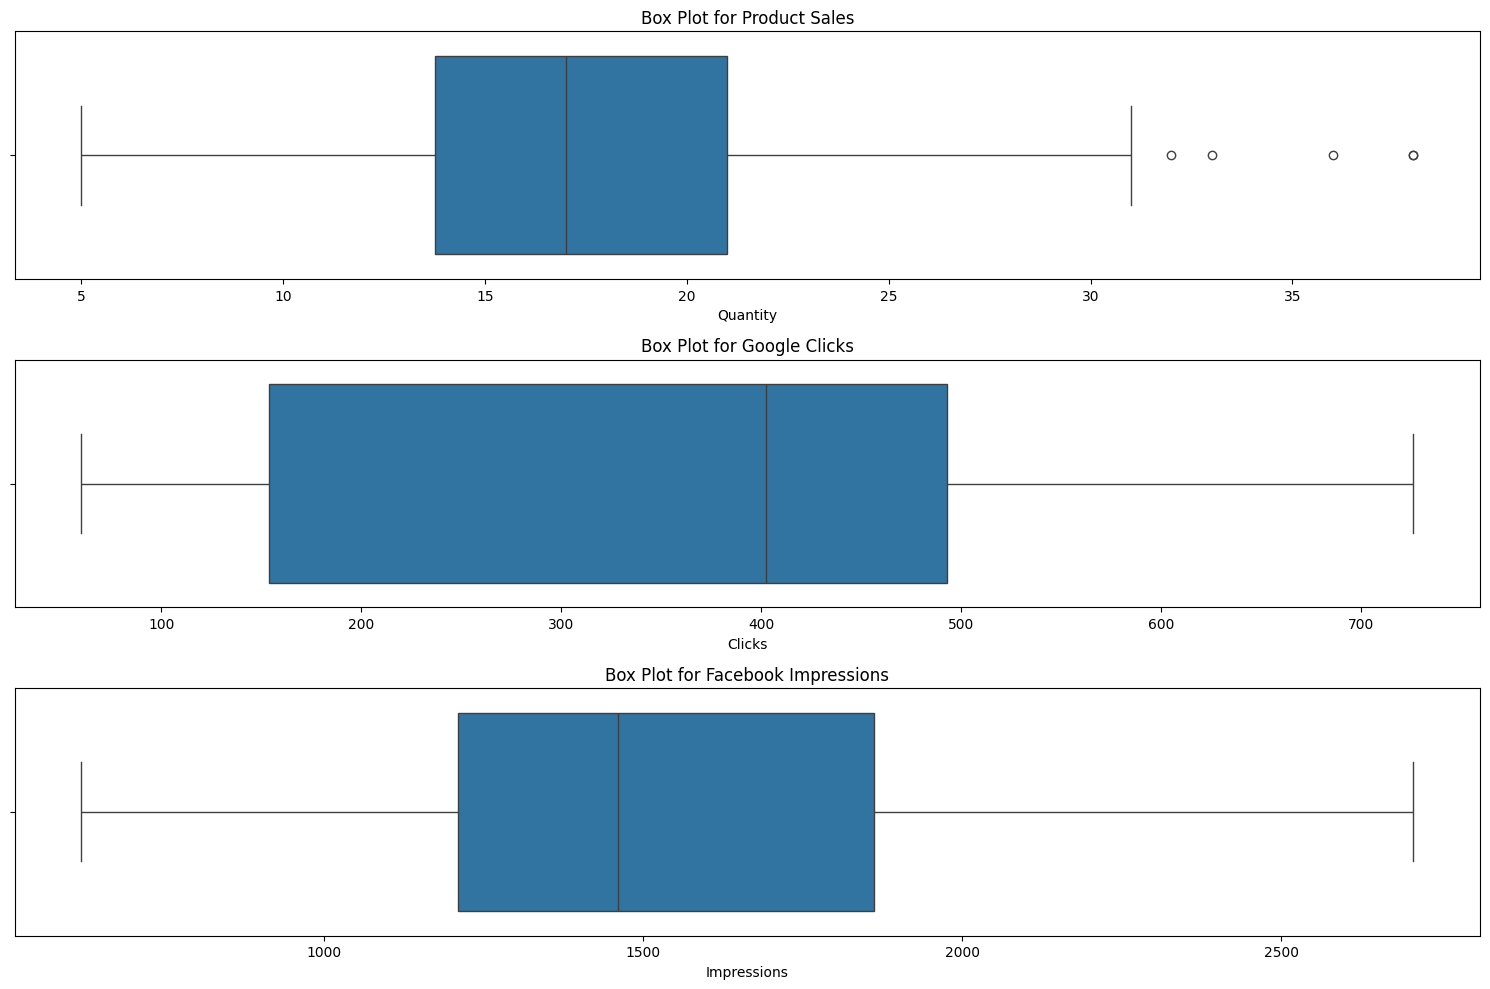

In [ ]:
# Detect outliers using box plots
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
sns.boxplot(x=merged_data['Quantity'])
plt.title('Box Plot for Product Sales')

plt.subplot(3, 1, 2)
sns.boxplot(x=merged_data['Clicks'])
plt.title('Box Plot for Google Clicks')

plt.subplot(3, 1, 3)
sns.boxplot(x=merged_data['Impressions'])
plt.title('Box Plot for Facebook Impressions')

plt.tight_layout()
plt.show()


**Outlier Replacement**

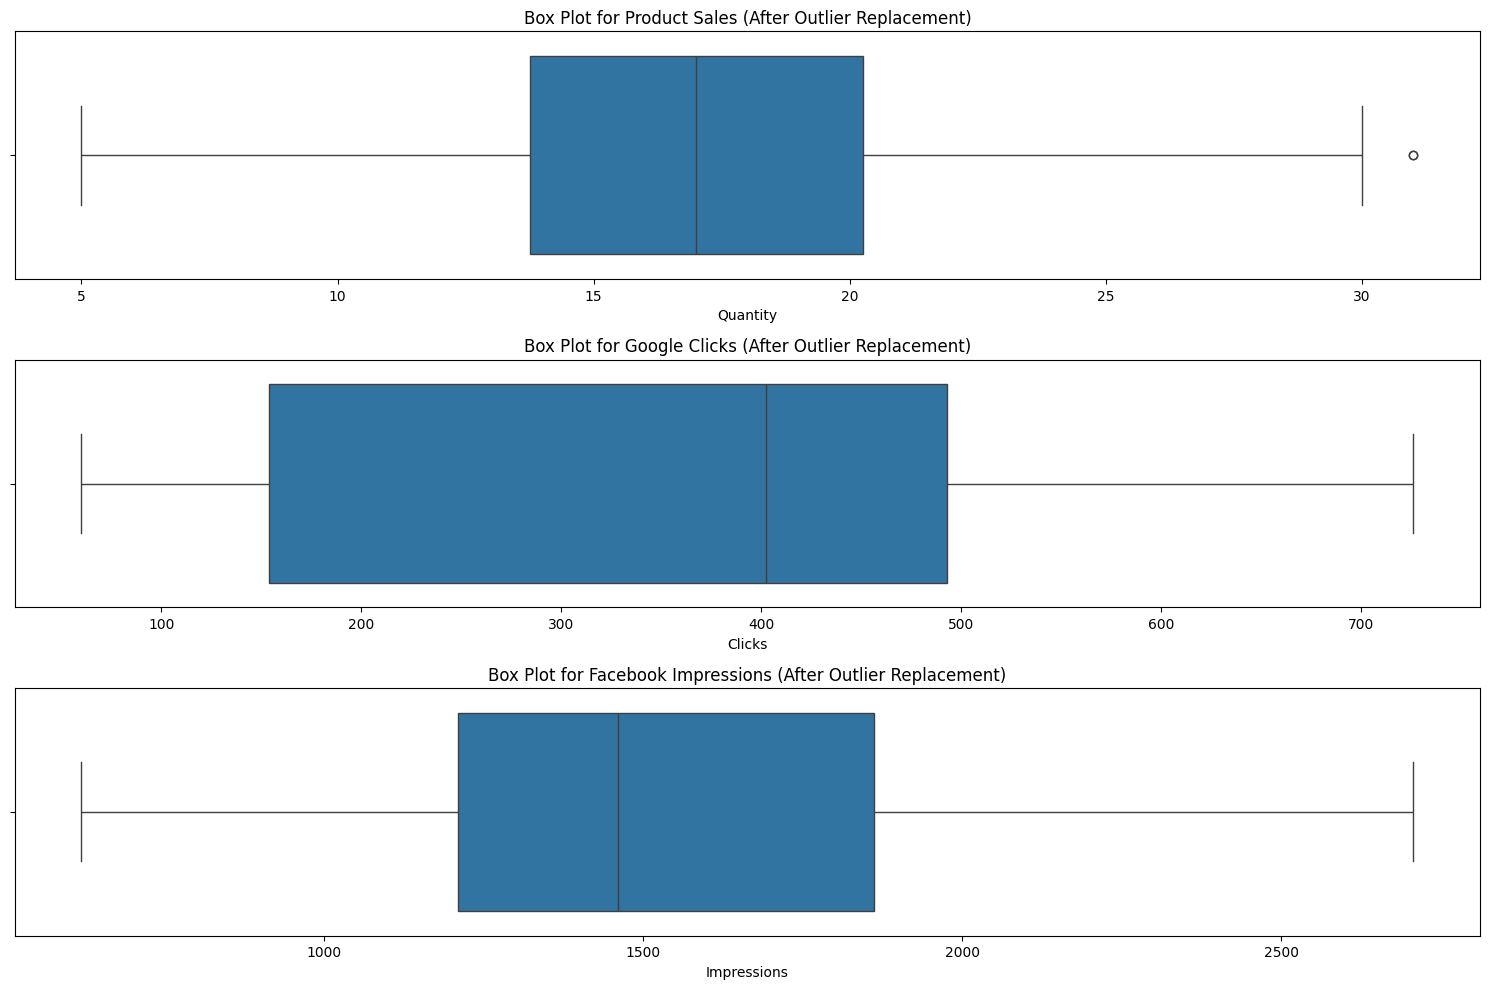

In [ ]:
# Replace outliers with the median value

def replace_outliers(column):
    Q1 = merged_data[column].quantile(0.25)
    Q3 = merged_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = merged_data[column].median()
    merged_data.loc[(merged_data[column] < lower_bound) | (merged_data[column] > upper_bound), column] = median

replace_outliers('Quantity')
replace_outliers('Clicks')
replace_outliers('Impressions')

# Display the box plots after outlier replacement
plt.figure(figsize=(15, 10))
plt.subplot(3, 1, 1)
sns.boxplot(x=merged_data['Quantity'])
plt.title('Box Plot for Product Sales (After Outlier Replacement)')

plt.subplot(3, 1, 2)
sns.boxplot(x=merged_data['Clicks'])
plt.title('Box Plot for Google Clicks (After Outlier Replacement)')

plt.subplot(3, 1, 3)
sns.boxplot(x=merged_data['Impressions'])
plt.title('Box Plot for Facebook Impressions (After Outlier Replacement)')

plt.tight_layout()
plt.show()

**Feature Engineering**

In [ ]:
# Feature engineering
merged_data['Day Index'] = pd.to_datetime(merged_data['Day Index'])
merged_data['Month'] = merged_data['Day Index'].dt.month
merged_data['Day'] = merged_data['Day Index'].dt.dayofweek
merged_data['Quarter'] = merged_data['Day Index'].dt.quarter
merged_data['Year'] = merged_data['Day Index'].dt.year

# Display the updated DataFrame
merged_data.head()

,Day Index,Quantity,Clicks,Impressions,Month,Day,Quarter,Year
0,2021-12-01,14,445.0,620,12,2,4,2021
1,2021-12-02,10,433.0,890,12,3,4,2021
2,2021-12-03,13,424.0,851,12,4,4,2021
3,2021-12-04,22,427.0,881,12,5,4,2021
4,2021-12-05,17,451.0,678,12,6,4,2021


**Visualizations**

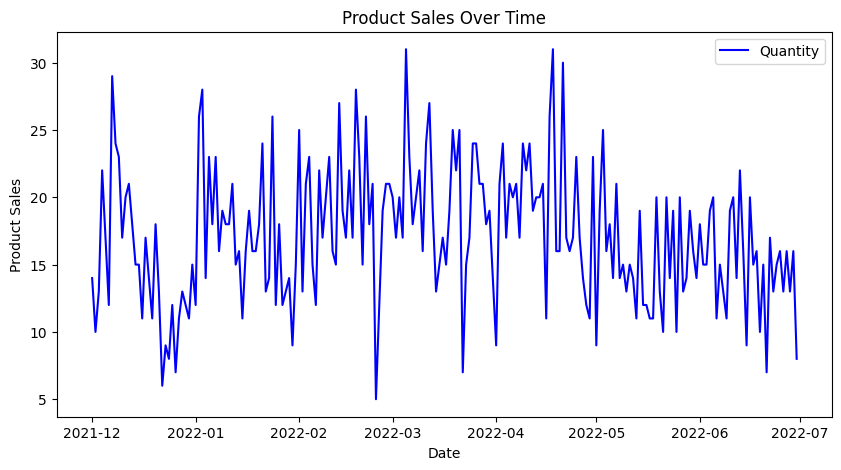

<ipython-input-8-8ff658f0b742>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Quantity', data=merged_data, palette='viridis')


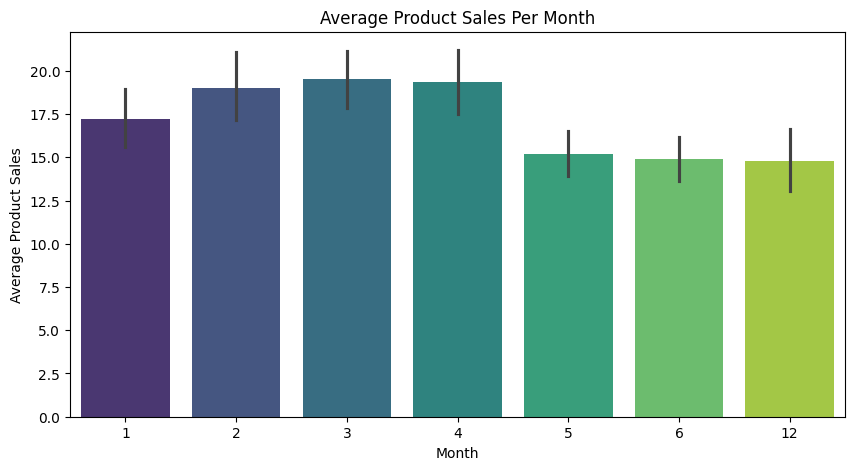

In [ ]:
# Line chart for product sales over time
plt.figure(figsize=(10, 5))
plt.plot(merged_data['Day Index'], merged_data['Quantity'], label='Quantity', color='blue')
plt.xlabel('Date')
plt.ylabel('Product Sales')
plt.title('Product Sales Over Time')
plt.legend()
plt.show()

# Bar chart for average sales per month
plt.figure(figsize=(10, 5))
sns.barplot(x='Month', y='Quantity', data=merged_data, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Average Product Sales')
plt.title('Average Product Sales Per Month')
plt.show()


**Correlation Matrix**

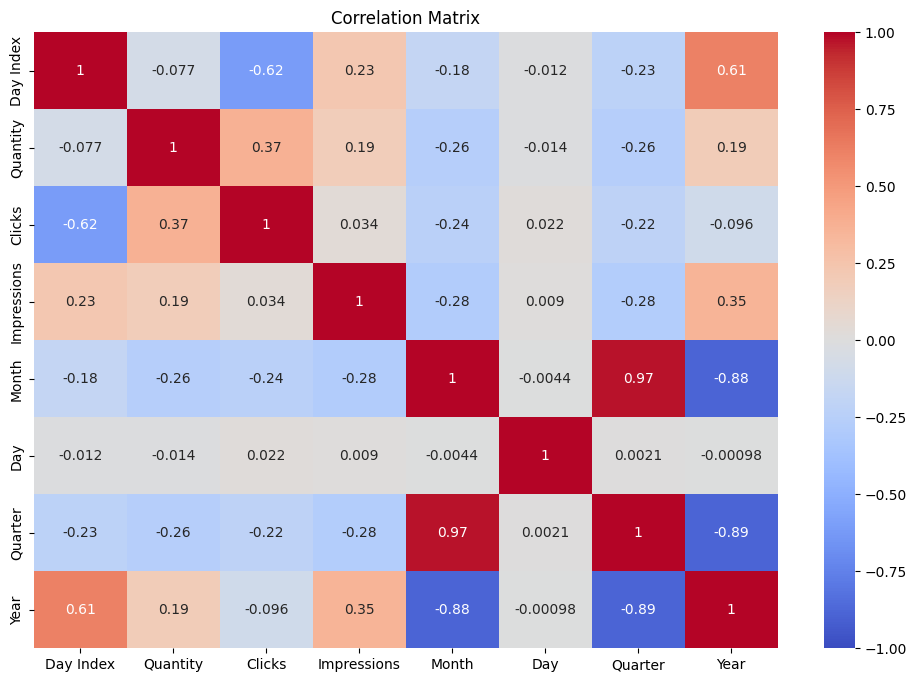

In [ ]:
# Correlation matrix
corr_matrix = merged_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


**Impact of Google Clicks and Facebook Impressions**

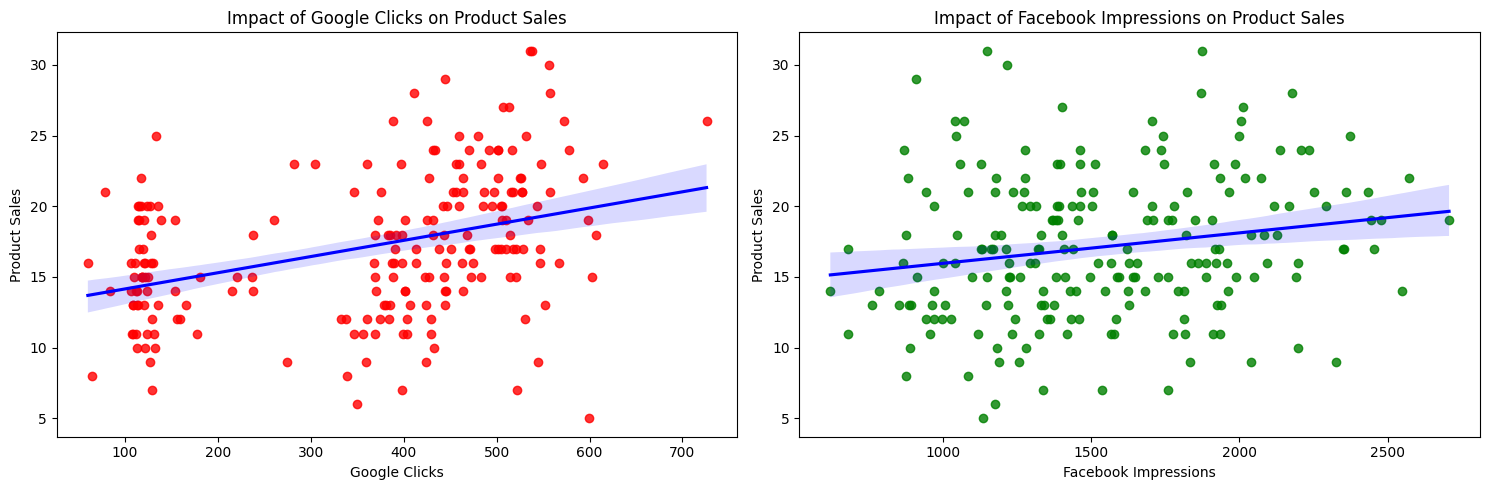

In [ ]:
# Impact of Google Clicks and Facebook Impressions on Product Sales
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.regplot(x='Clicks', y='Quantity', data=merged_data, color='red', line_kws={"color": "blue"})
plt.xlabel('Google Clicks')
plt.ylabel('Product Sales')
plt.title('Impact of Google Clicks on Product Sales')

plt.subplot(1, 2, 2)
sns.regplot(x='Impressions', y='Quantity', data=merged_data, color='green', line_kws={"color": "blue"})
plt.xlabel('Facebook Impressions')
plt.ylabel('Product Sales')
plt.title('Impact of Facebook Impressions on Product Sales')

plt.tight_layout()
plt.show()

# Time Series Analysis and Forecasting

**Time Series Analysis**

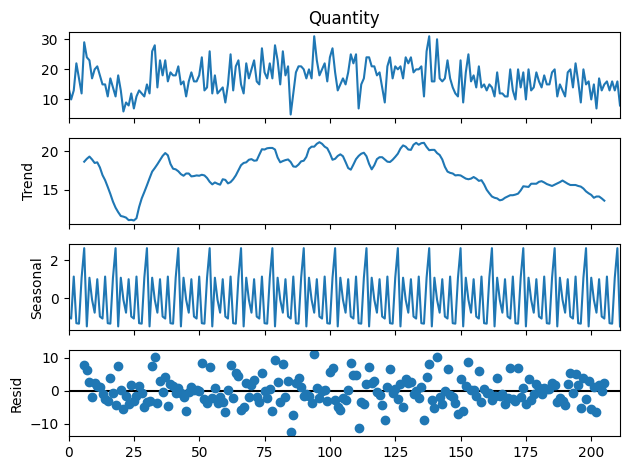

In [ ]:
# Decompose the time series
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(merged_data['Quantity'], model='additive', period=12)
decomposition.plot()
plt.show()


**ADF Test**

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(merged_data['Quantity'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -5.561825449168603
p-value: 1.5356483232839437e-06


This indicates that the time series data for 'Quantity' is stationary, meaning it does not have a unit root and its statistical properties remain constant over time.

**Seasonality and Trend Analysis**

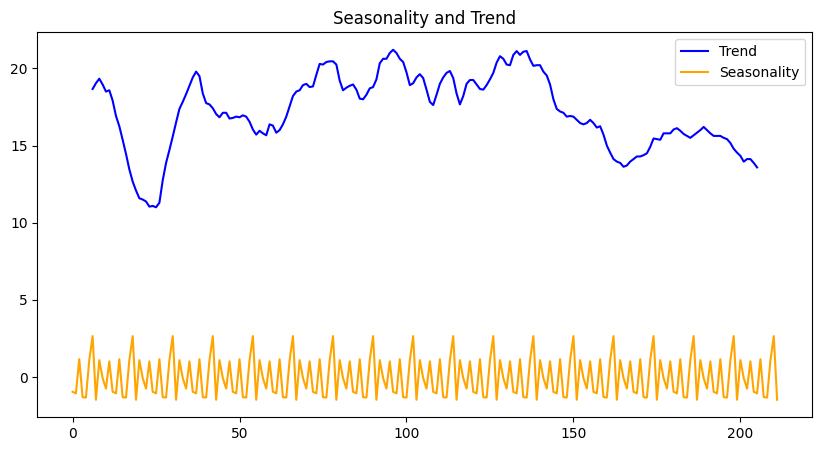

In [ ]:
# Plot seasonality and trend
plt.figure(figsize=(10, 5))
plt.plot(decomposition.trend, label='Trend', color='blue')
plt.plot(decomposition.seasonal, label='Seasonality', color='orange')
plt.legend()
plt.title('Seasonality and Trend')
plt.show()


**Lagged Impact**

In [ ]:
# Create lagged features
merged_data['lagged_sales'] = merged_data['Quantity'].shift(1)

# Display the first few rows of the updated DataFrame
merged_data[['Day Index', 'Quantity', 'lagged_sales']].head()

,Day Index,Quantity,lagged_sales
0,2021-12-01,14,NaN
1,2021-12-02,10,14.0
2,2021-12-03,13,10.0
3,2021-12-04,22,13.0
4,2021-12-05,17,22.0


**ACF & PACF Plots**

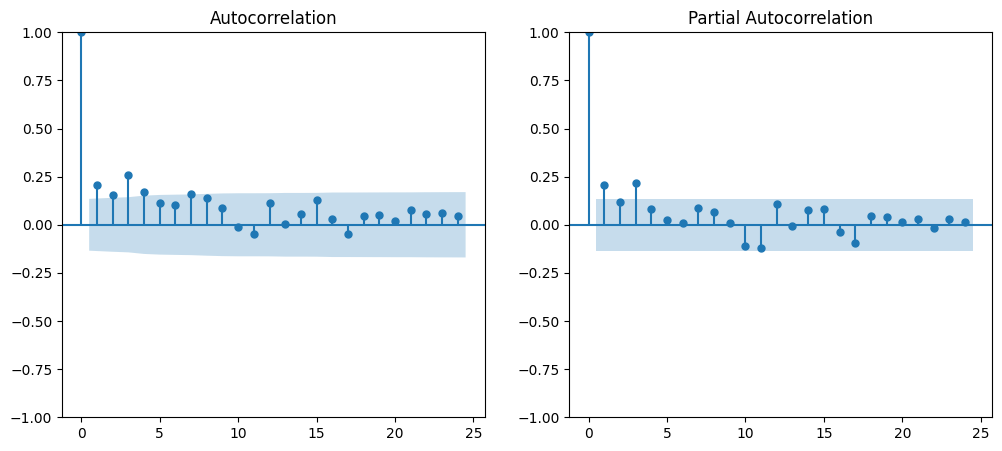

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plot_acf(merged_data['Quantity'].dropna(), ax=plt.gca())
plt.subplot(1, 2, 2)
plot_pacf(merged_data['Quantity'].dropna(), ax=plt.gca())
plt.show()


Order of MA in ARIMA

Order of AR in ARIMA

**AR Model**

AR Model - Evaluation Metrics
        Metric      Value
0         RMSE   4.949141
1          MAE   4.002480
2         MAPE  27.436296
3           R²   0.043061
4  Adjusted R²   0.038504


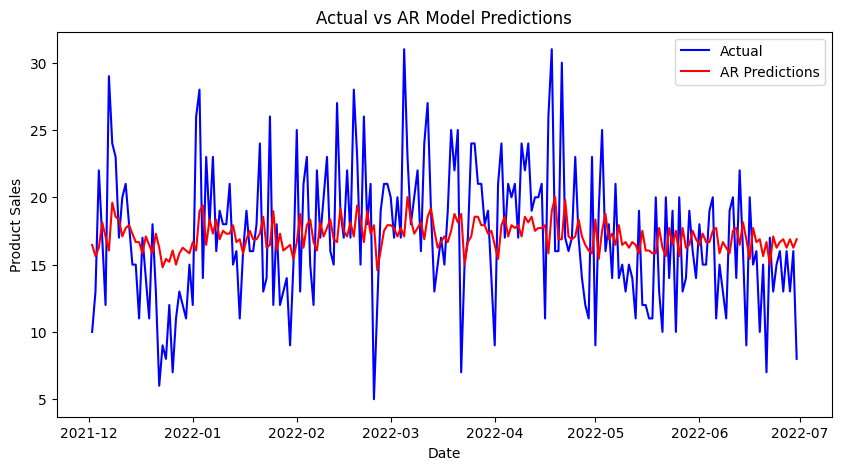

In [ ]:
from sklearn.metrics import r2_score
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
# Fit the AR model
ar_model = AutoReg(merged_data['Quantity'].dropna(), lags=1).fit()
ar_predictions = ar_model.predict(start=1, end=len(merged_data['Quantity'])-1)

# Calculate evaluation metrics for AR model
rmse_ar = mean_squared_error(merged_data['Quantity'][1:], ar_predictions, squared=False)
mae_ar = mean_absolute_error(merged_data['Quantity'][1:], ar_predictions)
mape_ar = np.mean(np.abs((merged_data['Quantity'][1:] - ar_predictions) / merged_data['Quantity'][1:])) * 100
r2_ar = r2_score(merged_data['Quantity'][1:], ar_predictions)
adjusted_r2_ar = 1 - (1 - r2_ar) * (len(merged_data['Quantity']) - 1) / (len(merged_data['Quantity']) - 2)

# Print evaluation metrics in tabular format
print('AR Model - Evaluation Metrics')
print(pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'MAPE', 'R²', 'Adjusted R²'],
    'Value': [rmse_ar, mae_ar, mape_ar, r2_ar, adjusted_r2_ar]
}))

# Visualize AR model predictions
plt.figure(figsize=(10, 5))
plt.plot(merged_data['Day Index'][1:], merged_data['Quantity'][1:], label='Actual', color='blue')
plt.plot(merged_data['Day Index'][1:], ar_predictions, label='AR Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('Product Sales')
plt.title('Actual vs AR Model Predictions')
plt.legend()
plt.show()


A low p-value suggests the lagged variable is statistically significant.

**MA Model**

MA Model - Evaluation Metrics
        Metric      Value
0         RMSE   4.964023
1          MAE   3.894248
2         MAPE  26.565478
3           R²   0.034470
4  Adjusted R²   0.029872


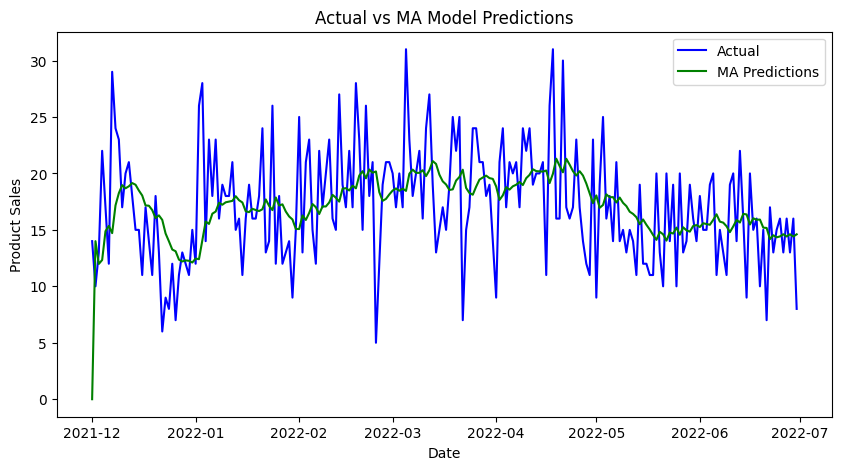

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
ma_model = ARIMA(merged_data['Quantity'].dropna(), order=(0, 1, 1)).fit()
ma_predictions = ma_model.fittedvalues

# Calculate evaluation metrics for MA model
rmse_ma = mean_squared_error(merged_data['Quantity'].dropna(), ma_predictions, squared=False)
mae_ma = mean_absolute_error(merged_data['Quantity'].dropna(), ma_predictions)
mape_ma = np.mean(np.abs((merged_data['Quantity'].dropna() - ma_predictions) / merged_data['Quantity'].dropna())) * 100
r2_ma = r2_score(merged_data['Quantity'].dropna(), ma_predictions)
adjusted_r2_ma = 1 - (1 - r2_ma) * (len(merged_data['Quantity']) - 1) / (len(merged_data['Quantity']) - 2)

# Print evaluation metrics in tabular format
print('MA Model - Evaluation Metrics')
print(pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'MAPE', 'R²', 'Adjusted R²'],
    'Value': [rmse_ma, mae_ma, mape_ma, r2_ma, adjusted_r2_ma]
}))

# Visualize MA model predictions
plt.figure(figsize=(10, 5))
plt.plot(merged_data['Day Index'], merged_data['Quantity'], label='Actual', color='blue')
plt.plot(merged_data['Day Index'], ma_predictions, label='MA Predictions', color='green')
plt.xlabel('Date')
plt.ylabel('Product Sales')
plt.title('Actual vs MA Model Predictions')
plt.legend()
plt.show()


**ARIMA**

ARIMA Model - Evaluation Metrics
        Metric      Value
0         RMSE   4.958527
1          MAE   3.910869
2         MAPE  26.763161
3           R²   0.036607
4  Adjusted R²   0.032019


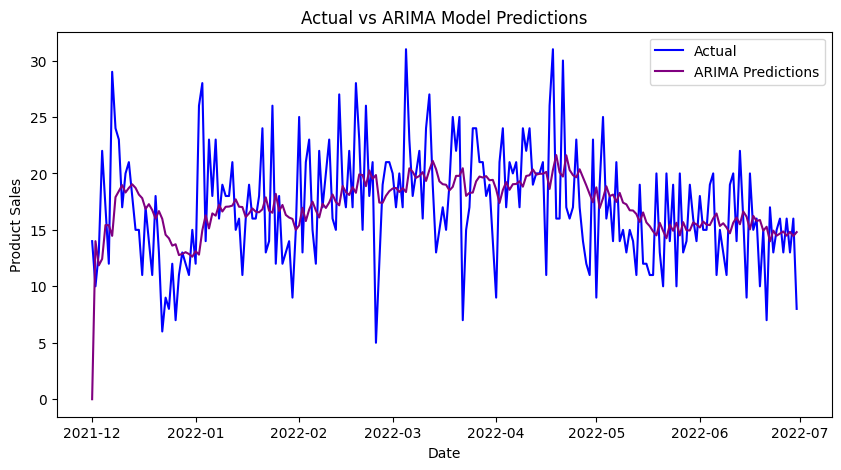

In [ ]:
# Fit the ARIMA model
arima_model = ARIMA(merged_data['Quantity'].dropna(), order=(1, 1, 1)).fit()
arima_predictions = arima_model.fittedvalues

# Calculate evaluation metrics for ARIMA model
rmse_arima = mean_squared_error(merged_data['Quantity'].dropna(), arima_predictions, squared=False)
mae_arima = mean_absolute_error(merged_data['Quantity'].dropna(), arima_predictions)
mape_arima = np.mean(np.abs((merged_data['Quantity'].dropna() - arima_predictions) / merged_data['Quantity'].dropna())) * 100
r2_arima = r2_score(merged_data['Quantity'].dropna(), arima_predictions)
adjusted_r2_arima = 1 - (1 - r2_arima) * (len(merged_data['Quantity']) - 1) / (len(merged_data['Quantity']) - 2)

# Print evaluation metrics in tabular format
print('ARIMA Model - Evaluation Metrics')
print(pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'MAPE', 'R²', 'Adjusted R²'],
    'Value': [rmse_arima, mae_arima, mape_arima, r2_arima, adjusted_r2_arima]
}))

# Visualize ARIMA model predictions
plt.figure(figsize=(10, 5))
plt.plot(merged_data['Day Index'], merged_data['Quantity'], label='Actual', color='blue')
plt.plot(merged_data['Day Index'], arima_predictions, label='ARIMA Predictions', color='purple')
plt.xlabel('Date')
plt.ylabel('Product Sales')
plt.title('Actual vs ARIMA Model Predictions')
plt.legend()
plt.show()


**ARIMAX**

exog_train shape: (169, 6)
exog_val shape: (43, 6)
exog_train shape after adding constant: (169, 6)
exog_val shape after adding constant: (43, 6)


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMAX Model - Evaluation Metrics on Validation Data
        Metric      Value
0         RMSE   5.652697
1          MAE   4.770261
2         MAPE  29.328137
3           R²  -1.429121
4  Adjusted R²  -1.833974


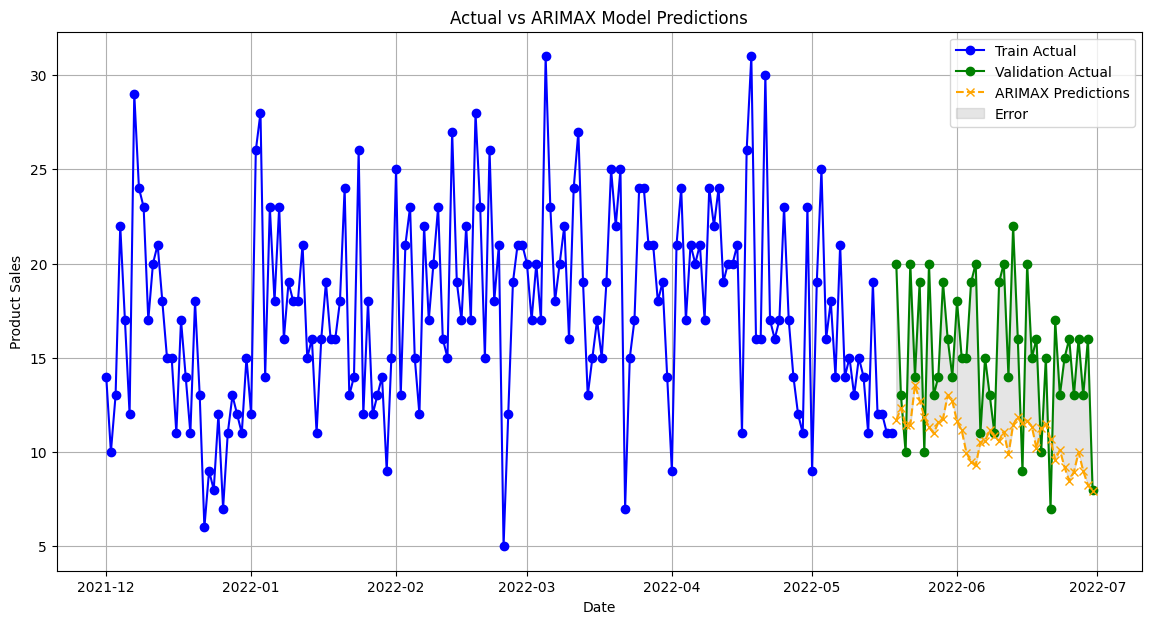

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
merged_data['Quantity'].fillna(method='ffill', inplace=True)

# Ensure merged_data has no missing values for the required columns
merged_data = merged_data.dropna(subset=['Quantity', 'Clicks', 'Impressions', 'Month', 'Day', 'Quarter', 'Year'])

# Split data into training and validation sets
split_ratio = 0.8
split_index = int(len(merged_data) * split_ratio)
train_data = merged_data.iloc[:split_index]
val_data = merged_data.iloc[split_index:]

# Prepare exogenous variables for ARIMAX model
exog_train = train_data[['Clicks', 'Impressions', 'Month', 'Day', 'Quarter', 'Year']]
exog_val = val_data[['Clicks', 'Impressions', 'Month', 'Day', 'Quarter', 'Year']]

# Ensure the shapes are correct
print(f'exog_train shape: {exog_train.shape}')
print(f'exog_val shape: {exog_val.shape}')

# Optional: Remove constant term from exog_train (if not crucial)
# exog_train = exog_train.iloc[:, :-1]  # Select all columns except the last one (constant)

# Ensure the shapes are correct after adding the constant (no change here)
print(f'exog_train shape after adding constant: {exog_train.shape}')
print(f'exog_val shape after adding constant: {exog_val.shape}')

# Fit the ARIMAX model on the training data
arimax_model = ARIMA(train_data['Quantity'], order=(1, 1, 1), exog=exog_train).fit()

# Predict on the validation data
arimax_predictions = arimax_model.predict(start=split_index, end=len(merged_data) - 1, exog=exog_val)

# Calculate evaluation metrics for ARIMAX model on validation data
rmse_arimax = mean_squared_error(val_data['Quantity'], arimax_predictions, squared=False)
mae_arimax = mean_absolute_error(val_data['Quantity'], arimax_predictions)
mape_arimax = np.mean(np.abs((val_data['Quantity'] - arimax_predictions) / val_data['Quantity'])) * 100
r2_arimax = r2_score(val_data['Quantity'], arimax_predictions)
adjusted_r2_arimax = 1 - (1 - r2_arimax) * (len(val_data['Quantity']) - 1) / (len(val_data['Quantity']) - exog_val.shape[1] - 1)

# Print evaluation metrics in tabular format
print('ARIMAX Model - Evaluation Metrics on Validation Data')
print(pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'MAPE', 'R²', 'Adjusted R²'],
    'Value': [rmse_arimax, mae_arimax, mape_arimax, r2_arimax, adjusted_r2_arimax]
}))

# Visualize ARIMAX model predictions
plt.figure(figsize=(14, 7))
plt.plot(train_data['Day Index'], train_data['Quantity'], label='Train Actual', color='blue', linestyle='-', marker='o')
plt.plot(val_data['Day Index'], val_data['Quantity'], label='Validation Actual', color='green', linestyle='-', marker='o')
plt.plot(val_data['Day Index'], arimax_predictions, label='ARIMAX Predictions', color='orange', linestyle='--', marker='x')
plt.fill_between(val_data['Day Index'], arimax_predictions, val_data['Quantity'], color='gray', alpha=0.2, label='Error')
plt.xlabel('Date')
plt.ylabel('Product Sales')
plt.title('Actual vs ARIMAX Model Predictions')
plt.legend()
plt.grid(True)
plt.show()


**SRIMAX model**


SRIMAX Model - Evaluation Metrics
        Metric      Value
0         RMSE   4.035176
1          MAE   3.322807
2         MAPE  22.229703
3           R²  -0.237834
4  Adjusted R²  -0.268025


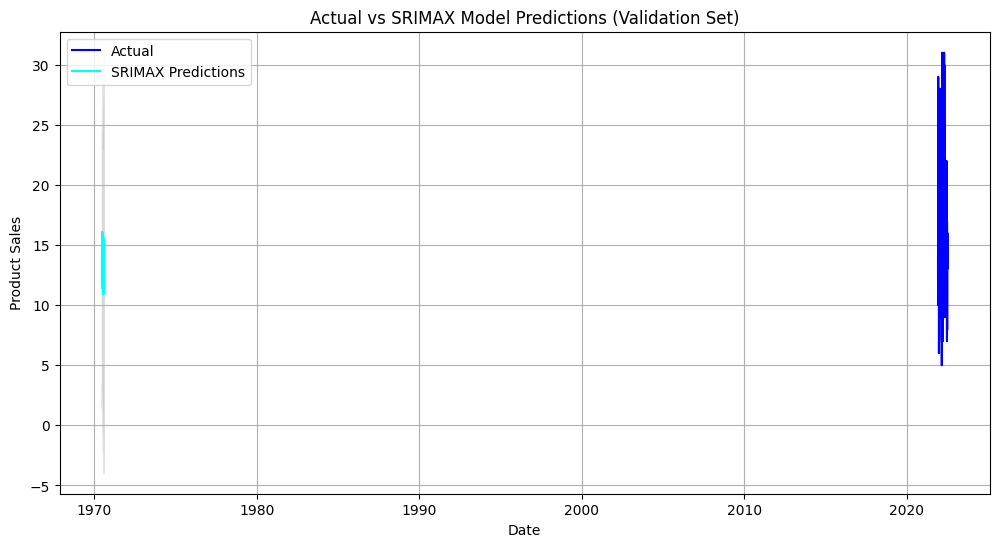

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Splitting data into train and validation sets
train_size = int(len(merged_data['Quantity']) * 0.8)  # 80% for training, adjust as needed
train_data = merged_data['Quantity'].dropna()[:train_size]
validation_data = merged_data['Quantity'].dropna()[train_size:]

# Fit the SARIMAX model
srimax_model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()

# Get predictions and confidence intervals for the validation period
forecast = srimax_model.get_prediction(start=validation_data.index[0], end=validation_data.index[-1], dynamic=False)
srimax_predictions = forecast.predicted_mean
confidence_int = forecast.conf_int()

# Calculate evaluation metrics for SRIMAX model
rmse_srimax = mean_squared_error(validation_data, srimax_predictions, squared=False)
mae_srimax = mean_absolute_error(validation_data, srimax_predictions)
mape_srimax = np.mean(np.abs((validation_data - srimax_predictions) / validation_data)) * 100
r2_srimax = r2_score(validation_data, srimax_predictions)
adjusted_r2_srimax = 1 - (1 - r2_srimax) * (len(validation_data) - 1) / (len(validation_data) - 2)

# Print evaluation metrics in tabular format
print('SRIMAX Model - Evaluation Metrics')
print(pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'MAPE', 'R²', 'Adjusted R²'],
    'Value': [rmse_srimax, mae_srimax, mape_srimax, r2_srimax, adjusted_r2_srimax]
}))

# Visualize SRIMAX model predictions with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Day Index'], merged_data['Quantity'], label='Actual', color='blue')
plt.plot(validation_data.index, srimax_predictions, label='SRIMAX Predictions', color='cyan')
plt.fill_between(confidence_int.index, confidence_int.iloc[:, 0], confidence_int.iloc[:, 1], color='k', alpha=0.1)
plt.xlabel('Date')
plt.ylabel('Product Sales')
plt.title('Actual vs SRIMAX Model Predictions (Validation Set)')
plt.legend()
plt.grid(True)
plt.show()


**Multivariate model**

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Evaluation Metrics
+----+--------------+---------+---------+---------+------------+---------------+
|    | Model        |    RMSE |     MAE |    MAPE |         R² |   Adjusted R² |
+====+==============+=========+=========+=========+============+===============+
|  0 | AR           | 4.44419 | 3.70309 | 30.9862 | -0.501494  |    -0.538116  |
+----+--------------+---------+---------+---------+------------+---------------+
|  1 | MA           | 4.43381 | 3.69275 | 30.9146 | -0.494485  |    -0.530936  |
+----+--------------+---------+---------+---------+------------+---------------+
|  2 | ARIMA        | 3.68105 | 2.96475 | 21.824  | -0.0301046 |    -0.0552291 |
+----+--------------+---------+---------+---------+------------+---------------+
|  3 | ARIMAX       | 5.61257 | 4.72802 | 29.0753 | -1.39475   |    -1.87371   |
+----+--------------+---------+---------+---------+------------+---------------+
|  4 | SRIMAX       | 4.31368 | 3.50844 | 22.832  | -0.414599  |    -0.697519  |
+--

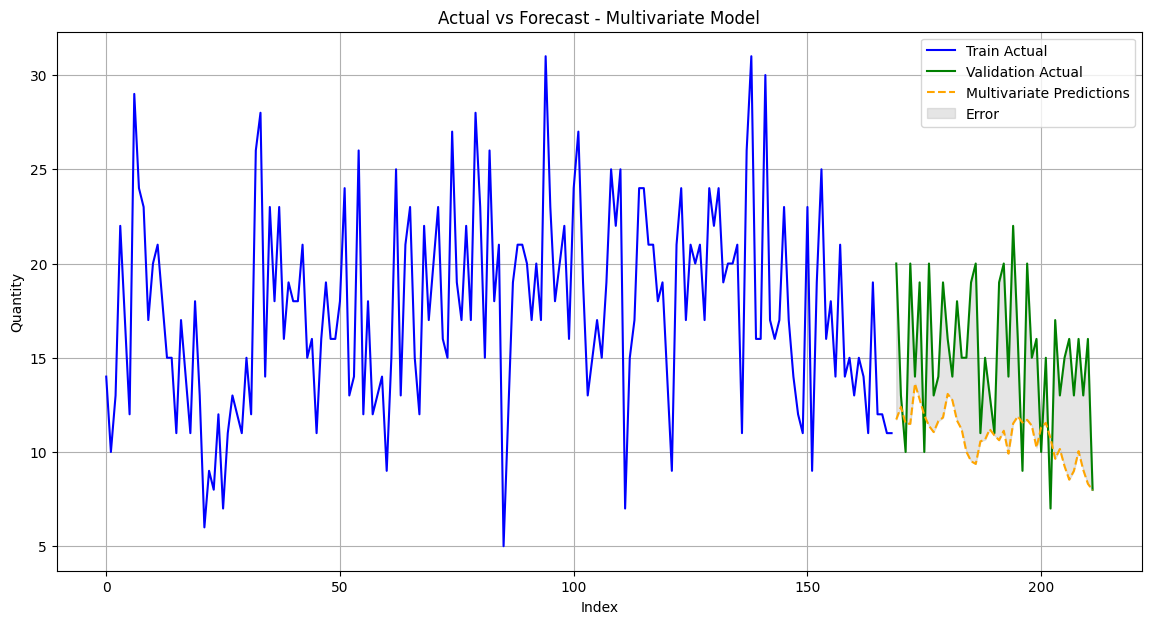

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from tabulate import tabulate

# Forward fill missing values in Quantity
merged_data['Quantity'].fillna(method='ffill', inplace=True)

# Ensure merged_data has no missing values for the required columns
merged_data = merged_data.dropna(subset=['Quantity', 'Clicks', 'Impressions', 'Month', 'Day', 'Quarter', 'Year'])

# Split data into training and validation sets
split_ratio = 0.8
split_index = int(len(merged_data) * split_ratio)
train_data = merged_data.iloc[:split_index]
val_data = merged_data.iloc[split_index:]

# Prepare exogenous variables for ARIMAX model
exog_train = train_data[['Clicks', 'Impressions', 'Month', 'Day', 'Quarter', 'Year']]
exog_val = val_data[['Clicks', 'Impressions', 'Month', 'Day', 'Quarter', 'Year']]

# Add a constant term for the exogenous variables
exog_train = sm.add_constant(exog_train)
exog_val = sm.add_constant(exog_val, has_constant='add')

# Function to calculate evaluation metrics
def calculate_metrics(true_values, predictions, exog_shape):
    rmse = mean_squared_error(true_values, predictions, squared=False)
    mae = mean_absolute_error(true_values, predictions)
    mape = np.mean(np.abs((true_values - predictions) / true_values)) * 100
    r2 = r2_score(true_values, predictions)
    adjusted_r2 = 1 - (1 - r2) * (len(true_values) - 1) / (len(true_values) - exog_shape[1] - 1)
    return rmse, mae, mape, r2, adjusted_r2

# Store evaluation metrics for all models
metrics = []

# AR Model
ar_model = AutoReg(train_data['Quantity'], lags=1).fit()
ar_predictions = ar_model.predict(start=split_index, end=len(merged_data) - 1)
ar_metrics = calculate_metrics(val_data['Quantity'], ar_predictions, (len(val_data), 1))
metrics.append(['AR', *ar_metrics])

# MA Model
ma_model = ARIMA(train_data['Quantity'], order=(0, 0, 1)).fit()
ma_predictions = ma_model.predict(start=split_index, end=len(merged_data) - 1)
ma_metrics = calculate_metrics(val_data['Quantity'], ma_predictions, (len(val_data), 1))
metrics.append(['MA', *ma_metrics])

# ARIMA Model
arima_model = ARIMA(train_data['Quantity'], order=(1, 1, 1)).fit()
arima_predictions = arima_model.predict(start=split_index, end=len(merged_data) - 1)
arima_metrics = calculate_metrics(val_data['Quantity'], arima_predictions, (len(val_data), 1))
metrics.append(['ARIMA', *arima_metrics])

# ARIMAX Model
arimax_model = ARIMA(train_data['Quantity'], order=(1, 1, 1), exog=exog_train).fit()
arimax_predictions = arimax_model.predict(start=split_index, end=len(merged_data) - 1, exog=exog_val)
arimax_metrics = calculate_metrics(val_data['Quantity'], arimax_predictions, exog_val.shape)
metrics.append(['ARIMAX', *arimax_metrics])

# SRIMAX Model (seasonal)
srimax_model = sm.tsa.statespace.SARIMAX(train_data['Quantity'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), exog=exog_train).fit()
srimax_predictions = srimax_model.predict(start=split_index, end=len(merged_data) - 1, exog=exog_val)
srimax_metrics = calculate_metrics(val_data['Quantity'], srimax_predictions, exog_val.shape)
metrics.append(['SRIMAX', *srimax_metrics])

# Multivariate Model Example (using exogenous variables)
multivariate_model = ARIMA(train_data['Quantity'], order=(1, 1, 1), exog=exog_train).fit()
multivariate_predictions = multivariate_model.predict(start=split_index, end=len(merged_data) - 1, exog=exog_val)
multivariate_metrics = calculate_metrics(val_data['Quantity'], multivariate_predictions, exog_val.shape)
metrics.append(['Multivariate', *multivariate_metrics])

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics, columns=['Model', 'RMSE', 'MAE', 'MAPE', 'R²', 'Adjusted R²'])

# Display the metrics with lines around the table
print('Model Evaluation Metrics')
print(tabulate(metrics_df, headers='keys', tablefmt='grid'))

# Visualization for Multivariate Model - Actual vs Forecast
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Quantity'], label='Train Actual', color='blue', linestyle='-')
plt.plot(val_data.index, val_data['Quantity'], label='Validation Actual', color='green', linestyle='-')
plt.plot(val_data.index, multivariate_predictions, label='Multivariate Predictions', color='orange', linestyle='--')
plt.fill_between(val_data.index, multivariate_predictions, val_data['Quantity'], color='gray', alpha=0.2, label='Error')
plt.xlabel('Index')
plt.ylabel('Quantity')
plt.title('Actual vs Forecast - Multivariate Model')
plt.legend()
plt.grid(True)
plt.show()


Evaluation Metrices

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tabulate import tabulate

# Forward fill missing values in Quantity
merged_data['Quantity'].fillna(method='ffill', inplace=True)

# Ensure merged_data has no missing values for the required columns
merged_data = merged_data.dropna(subset=['Quantity', 'Clicks', 'Impressions', 'Month', 'Day', 'Quarter', 'Year'])

# Split data into training and validation sets
split_ratio = 0.8
split_index = int(len(merged_data) * split_ratio)
train_data = merged_data.iloc[:split_index]
val_data = merged_data.iloc[split_index:]

# Prepare exogenous variables for ARIMAX model
exog_train = train_data[['Clicks', 'Impressions', 'Month', 'Day', 'Quarter', 'Year']]
exog_val = val_data[['Clicks', 'Impressions', 'Month', 'Day', 'Quarter', 'Year']]

# Add a constant term for the exogenous variables
exog_train = sm.add_constant(exog_train)
exog_val = sm.add_constant(exog_val, has_constant='add')

# Function to calculate evaluation metrics
def calculate_metrics(true_values, predictions, exog_shape):
    rmse = mean_squared_error(true_values, predictions, squared=False)
    mae = mean_absolute_error(true_values, predictions)
    mape = np.mean(np.abs((true_values - predictions) / true_values)) * 100
    r2 = r2_score(true_values, predictions)
    adjusted_r2 = 1 - (1 - r2) * (len(true_values) - 1) / (len(true_values) - exog_shape[1] - 1)
    return rmse, mae, mape, r2, adjusted_r2

# Store evaluation metrics for all models
metrics = []

# AR Model
ar_model = AutoReg(train_data['Quantity'], lags=1).fit()
ar_predictions = ar_model.predict(start=split_index, end=len(merged_data) - 1)
ar_metrics = calculate_metrics(val_data['Quantity'], ar_predictions, (len(val_data), 1))
metrics.append(['AR', *ar_metrics])

# MA Model
ma_model = ARIMA(train_data['Quantity'], order=(0, 0, 1)).fit()
ma_predictions = ma_model.predict(start=split_index, end=len(merged_data) - 1)
ma_metrics = calculate_metrics(val_data['Quantity'], ma_predictions, (len(val_data), 1))
metrics.append(['MA', *ma_metrics])

# ARIMA Model
arima_model = ARIMA(train_data['Quantity'], order=(1, 1, 1)).fit()
arima_predictions = arima_model.predict(start=split_index, end=len(merged_data) - 1)
arima_metrics = calculate_metrics(val_data['Quantity'], arima_predictions, (len(val_data), 1))
metrics.append(['ARIMA', *arima_metrics])

# ARIMAX Model
arimax_model = ARIMA(train_data['Quantity'], order=(1, 1, 1), exog=exog_train).fit()
arimax_predictions = arimax_model.predict(start=split_index, end=len(merged_data) - 1, exog=exog_val)
arimax_metrics = calculate_metrics(val_data['Quantity'], arimax_predictions, exog_val.shape)
metrics.append(['ARIMAX', *arimax_metrics])

# SRIMAX Model (seasonal)
srimax_model = sm.tsa.statespace.SARIMAX(train_data['Quantity'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), exog=exog_train).fit()
srimax_predictions = srimax_model.predict(start=split_index, end=len(merged_data) - 1, exog=exog_val)
srimax_metrics = calculate_metrics(val_data['Quantity'], srimax_predictions, exog_val.shape)
metrics.append(['SRIMAX', *srimax_metrics])

# Multivariate Model Example (using exogenous variables)
# Note: This is a simplified example, you can replace it with an actual multivariate time series model.
multivariate_model = ARIMA(train_data['Quantity'], order=(1, 1, 1), exog=exog_train).fit()
multivariate_predictions = multivariate_model.predict(start=split_index, end=len(merged_data) - 1, exog=exog_val)
multivariate_metrics = calculate_metrics(val_data['Quantity'], multivariate_predictions, exog_val.shape)
metrics.append(['Multivariate', *multivariate_metrics])

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics, columns=['Model', 'RMSE', 'MAE', 'MAPE', 'R²', 'Adjusted R²'])

# Display the metrics with lines around the table
print('Model Evaluation Metrics')
print(tabulate(metrics_df, headers='keys', tablefmt='grid'))



/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Evaluation Metrics
+----+--------------+---------+---------+---------+------------+---------------+
|    | Model        |    RMSE |     MAE |    MAPE |         R² |   Adjusted R² |
+====+==============+=========+=========+=========+============+===============+
|  0 | AR           | 4.44419 | 3.70309 | 30.9862 | -0.501494  |    -0.538116  |
+----+--------------+---------+---------+---------+------------+---------------+
|  1 | MA           | 4.43381 | 3.69275 | 30.9146 | -0.494485  |    -0.530936  |
+----+--------------+---------+---------+---------+------------+---------------+
|  2 | ARIMA        | 3.68105 | 2.96475 | 21.824  | -0.0301046 |    -0.0552291 |
+----+--------------+---------+---------+---------+------------+---------------+
|  3 | ARIMAX       | 5.61257 | 4.72802 | 29.0753 | -1.39475   |    -1.87371   |
+----+--------------+---------+---------+---------+------------+---------------+
|  4 | SRIMAX       | 4.31368 | 3.50844 | 22.832  | -0.414599  |    -0.697519  |
+--

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Model Evaluation Metrics
+----+--------------+---------+---------+---------+------------+---------------+
|    | Model        |    RMSE |     MAE |    MAPE |         R² |   Adjusted R² |
+====+==============+=========+=========+=========+============+===============+
|  0 | AR           | 4.44419 | 3.70309 | 30.9862 | -0.501494  |    -0.538116  |
+----+--------------+---------+---------+---------+------------+---------------+
|  1 | MA           | 4.43381 | 3.69275 | 30.9146 | -0.494485  |    -0.530936  |
+----+--------------+---------+---------+---------+------------+---------------+
|  2 | ARIMA        | 3.68105 | 2.96475 | 21.824  | -0.0301046 |    -0.0552291 |
+----+--------------+---------+---------+---------+------------+---------------+
|  3 | ARIMAX       | 5.61257 | 4.72802 | 29.0753 | -1.39475   |    -1.87371   |
+----+--------------+---------+---------+---------+------------+---------------+
|  4 | SRIMAX       | 4.31368 | 3.50844 | 22.832  | -0.414599  |    -0.697519  |
+--

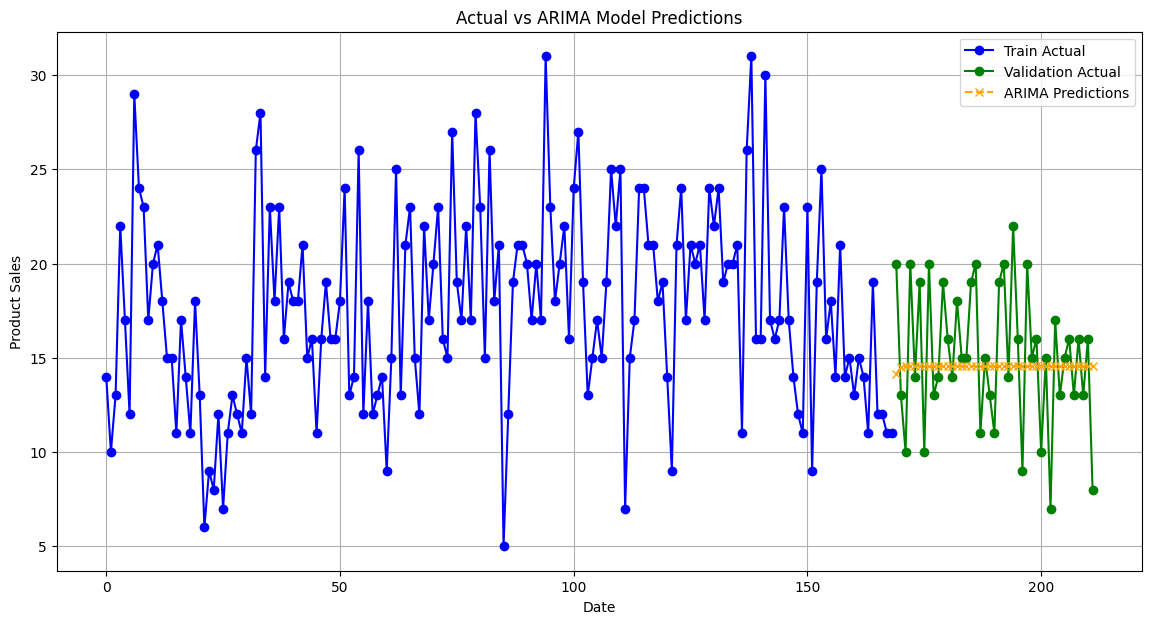

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Forward fill missing values in Quantity
merged_data['Quantity'].fillna(method='ffill', inplace=True)

# Ensure merged_data has no missing values for the required columns
merged_data = merged_data.dropna(subset=['Quantity', 'Clicks', 'Impressions', 'Month', 'Day', 'Quarter', 'Year'])

# Split data into training and validation sets
split_ratio = 0.8
split_index = int(len(merged_data) * split_ratio)
train_data = merged_data.iloc[:split_index]
val_data = merged_data.iloc[split_index:]

# Prepare exogenous variables for ARIMAX model
exog_train = train_data[['Clicks', 'Impressions', 'Month', 'Day', 'Quarter', 'Year']]
exog_val = val_data[['Clicks', 'Impressions', 'Month', 'Day', 'Quarter', 'Year']]

# Add a constant term for the exogenous variables
exog_train = sm.add_constant(exog_train)
exog_val = sm.add_constant(exog_val, has_constant='add')

# Function to calculate evaluation metrics
def calculate_metrics(true_values, predictions, exog_shape):
    rmse = mean_squared_error(true_values, predictions, squared=False)
    mae = mean_absolute_error(true_values, predictions)
    mape = np.mean(np.abs((true_values - predictions) / true_values)) * 100
    r2 = r2_score(true_values, predictions)
    adjusted_r2 = 1 - (1 - r2) * (len(true_values) - 1) / (len(true_values) - exog_shape[1] - 1)
    return rmse, mae, mape, r2, adjusted_r2

# Store evaluation metrics for all models
metrics = []

# AR Model
ar_model = AutoReg(train_data['Quantity'], lags=1).fit()
ar_predictions = ar_model.predict(start=split_index, end=len(merged_data) - 1)
ar_metrics = calculate_metrics(val_data['Quantity'], ar_predictions, (len(val_data), 1))
metrics.append(['AR', *ar_metrics])

# MA Model
ma_model = ARIMA(train_data['Quantity'], order=(0, 0, 1)).fit()
ma_predictions = ma_model.predict(start=split_index, end=len(merged_data) - 1)
ma_metrics = calculate_metrics(val_data['Quantity'], ma_predictions, (len(val_data), 1))
metrics.append(['MA', *ma_metrics])

# ARIMA Model
arima_model = ARIMA(train_data['Quantity'], order=(1, 1, 1)).fit()
arima_predictions = arima_model.predict(start=split_index, end=len(merged_data) - 1)
arima_metrics = calculate_metrics(val_data['Quantity'], arima_predictions, (len(val_data), 1))
metrics.append(['ARIMA', *arima_metrics])

# ARIMAX Model
arimax_model = ARIMA(train_data['Quantity'], order=(1, 1, 1), exog=exog_train).fit()
arimax_predictions = arimax_model.predict(start=split_index, end=len(merged_data) - 1, exog=exog_val)
arimax_metrics = calculate_metrics(val_data['Quantity'], arimax_predictions, exog_val.shape)
metrics.append(['ARIMAX', *arimax_metrics])

# SRIMAX Model (seasonal)
srimax_model = sm.tsa.statespace.SARIMAX(train_data['Quantity'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), exog=exog_train).fit()
srimax_predictions = srimax_model.predict(start=split_index, end=len(merged_data) - 1, exog=exog_val)
srimax_metrics = calculate_metrics(val_data['Quantity'], srimax_predictions, exog_val.shape)
metrics.append(['SRIMAX', *srimax_metrics])

# Multivariate Model Example (using exogenous variables)
# Note: This is a simplified example, you can replace it with an actual multivariate time series model.
multivariate_model = ARIMA(train_data['Quantity'], order=(1, 1, 1), exog=exog_train).fit()
multivariate_predictions = multivariate_model.predict(start=split_index, end=len(merged_data) - 1, exog=exog_val)
multivariate_metrics = calculate_metrics(val_data['Quantity'], multivariate_predictions, exog_val.shape)
metrics.append(['Multivariate', *multivariate_metrics])

# Create a DataFrame to display the metrics
metrics_df = pd.DataFrame(metrics, columns=['Model', 'RMSE', 'MAE', 'MAPE', 'R²', 'Adjusted R²'])

# Display the metrics with lines around the table
print('Model Evaluation Metrics')
print(tabulate(metrics_df, headers='keys', tablefmt='grid'))

# Visualize ARIMA model predictions
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Quantity'], label='Train Actual', color='blue', linestyle='-', marker='o')
plt.plot(val_data.index, val_data['Quantity'], label='Validation Actual', color='green', linestyle='-', marker='o')
plt.plot(val_data.index, arima_predictions, label='ARIMA Predictions', color='orange', linestyle='--', marker='x')
plt.xlabel('Date')
plt.ylabel('Product Sales')
plt.title('Actual vs ARIMA Model Predictions')
plt.legend()
plt.grid(True)
plt.show()






### Comparative Insights

1. **Best Performing Model:**
   - The **ARIMA Model** shows the lowest RMSE (3.68105) and MAE (2.96475 ), indicating it has the best overall performance in terms of accuracy.
   - It also has a relatively low MAPE (21.824), meaning it predicts the percentage errors better compared to other models.

